In [1]:
import keras

C:\Users\Munna chowhan\Anaconda3\anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
from keras.applications.vgg16 import VGG16

In [3]:
model = VGG16(weights="imagenet")

In [4]:
img_path = r"E:\elephant.jpg"

In [5]:
from keras.preprocessing import image

In [6]:
from keras.applications.vgg16 import preprocess_input, decode_predictions

In [7]:
import numpy as np

In [8]:
img = image.load_img(img_path, target_size = (224, 224))

In [9]:
x = image.img_to_array(img)

In [10]:
x = np.expand_dims(x, axis = 0)

In [11]:
x = preprocess_input(x)

In [12]:
preds = model.predict(x)

In [13]:
print("predictions: ",decode_predictions(preds, top = 4)[0])

predictions:  [('n02504458', 'African_elephant', 0.9094207), ('n01871265', 'tusker', 0.08618318), ('n02504013', 'Indian_elephant', 0.004354581), ('n02408429', 'water_buffalo', 3.99446e-05)]


In [14]:
decode_predictions(preds)[0][0]

('n02504458', 'African_elephant', 0.9094207)

In [15]:
np.argmax(preds[0])

386

In [16]:
african_elephant_output = model.output[:,386]

In [18]:
last_conv_layer = model.get_layer("block5_conv3")

In [20]:
from keras import backend as k

In [21]:
grads = k.gradients(african_elephant_output, last_conv_layer.output)[0]

In [23]:
pooled_grads = k.mean(grads, axis = (0,1,2))

In [25]:
iterate = k.function([model.input], [pooled_grads, last_conv_layer.output[0]])

In [26]:
pooled_grads_values, last_conv_layer_values = iterate([x])

In [28]:
for i in range(512):
    last_conv_layer_values[:,:,i] *= pooled_grads_values[i]

heatmap = np.mean(last_conv_layer_values, axis =-1)

In [29]:
heatmap = np.maximum(heatmap, 0)

In [30]:
heatmap /= np.max(heatmap)

In [31]:
import matplotlib.pyplot as plt

In [32]:
%matplotlib inline

<Figure size 1296x1296 with 0 Axes>

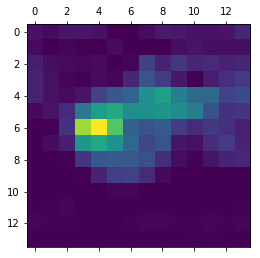

In [33]:
plt.figure(figsize=(18,18))
plt.matshow(heatmap);

In [34]:
import cv2

In [35]:
img = cv2.imread(img_path)

### resize the heatmap to the shape of the org image

In [36]:
heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))

#### convert the heatmap to RGB pixels

In [38]:
heatmap = np.uint8(255*heatmap)

In [39]:
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

In [40]:
superimposed = heatmap* 0.4 + img

In [41]:
cv2.imwrite(r"E:\elephant_cam2.jpg", superimposed)

True